In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [ ]:
base_model = VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [8]:
dataset_dir = "/content/drive/MyDrive/caltech-101-img"


In [9]:
dataset_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

In [10]:
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size = (64,64),
    batch_size=2000,
)

Found 884 images belonging to 102 classes.


In [12]:
xtrain,ytrain = dataset_generator[0]
xtest,ytest = dataset_generator[0]

In [13]:
print(len(xtrain))



884


In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
x = Flatten()(base_model.output)
x = Dense(64,activation='relu')(x)
x = Dense(102,activation='softmax')(x)

In [17]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input,outputs=x)

In [18]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(xtrain,ytrain,batch_size=64,epochs=1,validation_data=(xtest,ytest))


14/14 ━━━━━━━━━━━━━━━━━━━━ 87s 6s/step - accuracy: 0.1690 - loss: 3.9683 - val_accuracy: 0.5916 - val_loss: 1.7998


In [20]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False

# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True

# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(xtrain, ytrain, batch_size=64, epochs=1, validation_data=(xtest, ytest))

14/14 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.1815 - loss: 5.4032 - val_accuracy: 0.4672 - val_loss: 1.6535


In [21]:
import matplotlib.pyplot as plt
ypred = model.predict(xtest)


28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


In [22]:
labels = list(dataset_generator.class_indices.keys())


predicted watch
actual wheelchair


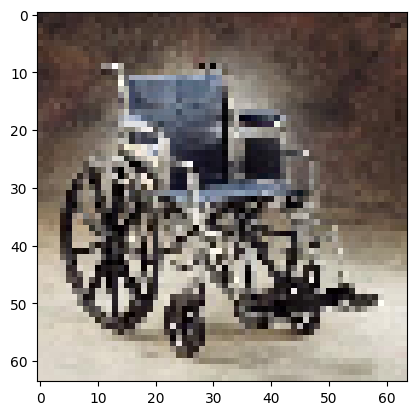

In [24]:
plt.imshow(xtest[787])
print("predicted",labels[np.argmax(ypred[787])])
print("actual",labels[np.argmax(ytest[787])])

In [26]:
dataset_datgen = ImageDataGenerator(
    rescale = 1.0/255
)
batch_size = 2000

dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 884 images belonging to 102 classes.


In [29]:
x_train,y_train = dataset_generator[0]

In [32]:
x_test,y_test = dataset_generator[0]

In [33]:
print(len(x_train))

884


In [34]:
print(len(x_test))

884


In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Flatten , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [36]:
base_model = VGG16(weights = weights_path , include_top = False , input_shape=(64,64,3))

In [39]:
for layer in base_model.layers:
  layer.trainable = False

In [42]:
x = Flatten()(base_model.output)
x = Dense(64 , activation = 'relu')(x)
predictions = Dense(102, activation = 'softmax')(x)

#crerate model
model = Model(inputs = base_model.input , outputs = predictions)

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.fit(x_train , y_train , epochs = 10 , validation_data = (x_test , y_test))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.2465 - loss: 3.5063 - val_accuracy: 0.6448 - val_loss: 1.2992
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7473 - loss: 1.0145 - val_accuracy: 0.8394 - val_loss: 0.6521
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8751 - loss: 0.5919 - val_accuracy: 0.8869 - val_loss: 0.4765
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8984 - loss: 0.4405 - val_accuracy: 0.9208 - val_loss: 0.3621
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9354 - loss: 0.3495 - val_accuracy: 0.9412 - val_loss: 0.2914
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9524 - loss: 0.2926 - val_accuracy: 0.9457 - val_loss: 0.2428
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.9509 - loss: 0.2175 - val_accuracy: 0.9615 - val_loss: 0.1964
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9666 - loss: 0.1827 - val_accuracy: 0.9661 - val_lo

In [46]:
base_model = VGG16(weights = weights_path , include_top = False , input_shape = (64,64,3))
for layer in base_model.layers:
  layer.trainable = False

#unfrezze last 4 layers
for layer in base_model.layers[len(base_model.layers)-2 :]:
  layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(512 , activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)

predictions = Dense(102 , activation = 'softmax')(x)

model = Model(inputs = base_model.input , outputs = predictions)
model.compile(optimizer = Adam(learning_rate = 0.01)  , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train , y_train , batch_size = 64 , epochs = 1 , validation_data = (x_test , y_test))

14/14 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.2716 - loss: 44.0856 - val_accuracy: 0.7896 - val_loss: 0.7643


In [47]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


In [50]:
labels = list(dataset_generator.class_indices.keys())

actical =  sunflower
predicted =  sunflower


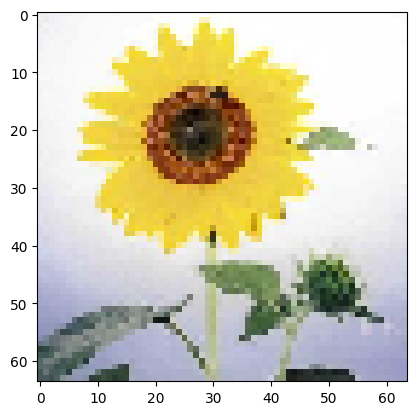

In [55]:
n = 300
plt.imshow(x_test[300])
print("actical = " , labels[(np.argmax(y_test[n]))])
print("predicted = " , labels[(np.argmax(predicted_value[n]))])